In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from scipy.stats import randint 
from scipy.stats import uniform
from skimage.io import imread, imshow
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [22]:
dataset = pd.read_csv('cancer.csv')
dataset.head()
#M = Malignant -  Harmfull (1)
#B = Benign - Harmless (0)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [23]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015062,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032218,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
#Check if nan values
dataset[dataset.isnull().any(axis=1)]
#No nan values so all good on that part

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

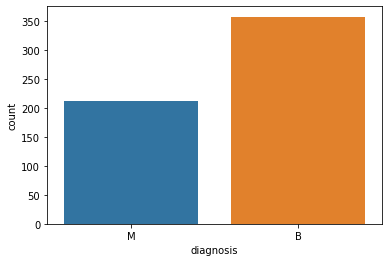

In [25]:
#Check class unbalancedness
sns.countplot(x='diagnosis',data=dataset)
#More B than M so class weights or oversampling will be needed

In [26]:
# Deleting id since it won't have any impact in this case
dataset=dataset.drop(['id'], axis=1)
# Replace B and M for 0 en 1 as output
dataset=dataset.replace(to_replace=['B', 'M'], value=[0, 1])

In [27]:
# Spliting features - targets
X = dataset.drop(['diagnosis'], axis=1)
y= dataset['diagnosis'].values
# Spliting training - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [28]:
# Normalisation of the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression models to compare with the SVM models

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best accuracy :  0.9734782608695653
Best parameters : {'C': 0.1, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]
97.36842105263158


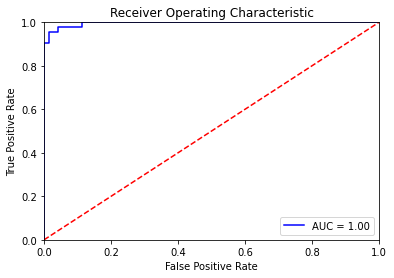

In [31]:
#Using Gridsearch on logistic regression
model = LogisticRegression(class_weight='balanced')
paramaters = [
             {'solver':['liblinear'],'C' : [0.001,0.01,0.1,1,10,100]},
             {'solver':['newton-cg'],'C' : [0.001,0.01,0.1,1,10,100]},
             {'solver':['lbfgs'],'C' : [0.001,0.01,0.1,1,10,100]}
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = 7,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
#ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Good accuracy. Also no huge bias for the majority class, class weights worked fine
#Also experimented with poly features but didn't give extra performance


Text(0.5, 1.0, 'Precision-Recall voor bepaling threshold')

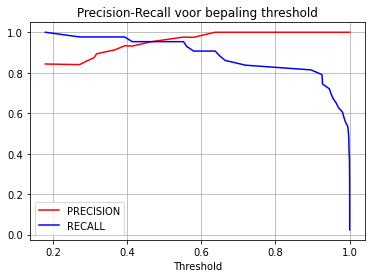

In [33]:
# reduceren van het aantal false negatives door de threshold aan te passen
# It's important to not mis any harmfull cancers so we could lower threshold to 0.4 and still get good precision
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_test, probs[:,1]) 

# Plotten van precision en recall 
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid()
plt.xlabel("Threshold")
plt.legend() 
plt.title('Precision-Recall voor bepaling threshold')

In [34]:
#Random search - logistic regression with poly features
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LogisticRegression(class_weight='balanced')
parameters = {'solver': ['liblinear','newton-cg','lbfgs'],
              'C': uniform(0.01, 100)} # haal C uit een random uniform distribution


n_iter_search = 100


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=30,n_iter=n_iter_search,n_jobs = 4,verbose=1)

random_search = random_search.fit(X_train_poly, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_poly)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
#We got slightly better performance with the random search, ofcourse this is bit of 'luck'
#there is a chance we don't have the optima

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best accuracy :  0.9733333333333333
Best parameters : {'C': 0.5580795995538412, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[42  1]
 [ 1 70]]
98.24561403508771


# SVM

In [35]:
#SVM - Gridsearch

model = SVC(class_weight='balanced')
paramaters = [ 
        {'kernel': ['linear'], 'C': np.logspace(0.001,10000,7)},
        {'kernel': ['rbf'], 'C': np.logspace(0.001,10000,7), 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':np.logspace(0.001,10000,7)} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 30,
                           n_jobs = 7,
                           verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print("Op test data:")
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
#Slightly worse than the logistic regression model

Fitting 30 folds for each of 49 candidates, totalling 1470 fits


/Users/alechantson/Library/Python/3.9/lib/python/site-packages/numpy/core/function_base.py:265: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


Best accuracy :  0.9779166666666668
Best parameters : {'C': 1.0023052380778996, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Op test data:
[[41  2]
 [ 2 69]]
96.49122807017544


In [36]:
# SVM - Random search
model = SVC(probability=True,class_weight="balanced")
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 50), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 0.1)}


n_iter_search = 100


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=30,n_iter=n_iter_search,n_jobs = 7,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 
#We see slightly more false negatives, ofcourse we don't reach the optimal here

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best accuracy :  0.9777777777777779
Best parameters : {'C': 17.233855848286, 'gamma': 0.005974942790365033, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[39  4]
 [ 2 69]]
94.73684210526315


# Oversampling

In [53]:
#Using SMOTE to fix the unbalancedness
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( k_neighbors=4, n_jobs=-1).fit_resample(X_train, y_train)

print(y_resampled.shape)

(572,)


<AxesSubplot:xlabel='diagnose', ylabel='count'>

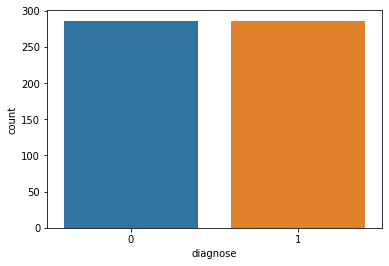

In [54]:
#AFTER SMOTE
df = pd.DataFrame(data=y_resampled, columns=["diagnose"])
sns.countplot(x='diagnose',data=df)

In [42]:
# SVM after resampling
model = SVC()
paramaters = [ 
        {'kernel': ['linear'], 'C': np.logspace(0.001,10000,7)},
        {'kernel': ['rbf'], 'C': np.logspace(0.001,10000,7), 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':np.logspace(0.001,10000,7)} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'recall',
                           cv = 30,
                           n_jobs = 2,
                           verbose = 4)
grid_search = grid_search.fit(X_resampled, y_resampled)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print("Op test data:")
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

/Users/alechantson/Library/Python/3.9/lib/python/site-packages/numpy/core/function_base.py:265: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


Fitting 30 folds for each of 49 candidates, totalling 1470 fits
Best accuracy :  0.9866666666666667
Best parameters : {'C': inf, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Op test data:
[[39  4]
 [ 3 68]]
93.85964912280701


In [43]:
# logistic after resampling
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
paramaters = [
             {'solver':['liblinear'],'C' : [0.001,0.01,0.1,1,10,100]},
             {'solver':['newton-cg'],'C' : [0.001,0.01,0.1,1,10,100]},
             {'solver':['lbfgs'],'C' : [0.001,0.01,0.1,1,10,100]}
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'recall',
                           cv = 50,
                           n_jobs = 6,
                           verbose=5)
grid_search = grid_search.fit(X_resampled, y_resampled)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

Fitting 50 folds for each of 18 candidates, totalling 900 fits
Best accuracy :  0.976
Best parameters : {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[41  2]
 [ 2 69]]
96.49122807017544


# CONCLUSIE
We actually see our logistic regression models performing a little better than our SVM's. so we can see it's import to try different solutions to a problem.

Also SMOTE isn't realy helping our models. This could be the case because our test data is unbalanced aswel. Slightly unbalanced data isn't always a bad thing if it represents reality. Ofcourse it's different for every ML problem

### Vraag 2. Insurance

De dataset insurance bevat gegevens over klanten van een verzekeringsmaatschappij die autoverzekeringen heeft aangeboden. De 'Response' variabele geeft weer of die klanten hebben ingetekend op een verzekeringscontract.
De features zijn de volgende:
- id = klantennummer
- Gender = geslacht van de klant (man of vrouw)
- Age = leeftijd in jaren van de klant 
- Driving_Licence = of de klant over een rijbewijs beschikt
- Region_Code = gegevens over waar de klant woont
- Previously_Insured = was de klant vroeger al eens verzekerd (1 of 0)
- Vehicle_Age = leeftijd van het voertuig
- Vehicle_Damage = of het voertuig als dan niet is beschadigd (Ja of Nee)
- Annual_Premium = bedrag van de verzekeringspremie
- Policy_Sales_Channel = hoe de verzekering wordt aangeboden (categorische feature)
- Vintage = Hoe lang tot op vandaag de klant al is verzekerd (in dagen uitgedrukt).

De bedoeling is om een zo classifier (logistic regression of SVM) te trainen die zo goed mogelijk kan voorspellen of een potentiële klant zal ingaan op een verzekeringsvoorstel.

Doorloop volgende stappen:

- Contoleer de gebalanceerheid van de dataset. Wat is de verhouding van de twee klasses?
- Verwijder de feature 'id'.
- Onderzoek of de kolom Driving_Licence in verwijderd kan worden.
- Verander categorische variabelen naar numerieke variabelen. Dit kan door binaire categorieën om te zetten naar 1/0 en door one-hot encoding toe te passen daar waar meerdere categorieën aanwezig zijn.
- Splits op in features en targets en vervolgens in een training set en test set. Zorg voor een test set met 80000 samples. Scale de dataset.
- Train een logistic regression model en SVM. Dit mag onmiddellijk via cross-validatie gebeuren.
- Onderzoek in welke mate het model last heeft van de ongebalanceerdheid van de dataset.
- Teken de ROC-curve. Kan je hieruit aflezen of de classifier al dan niet last heeft van niet-gebalanceerd.
- Teken nu ook de Precision-Recall curve. Wat kan je hieruit besluiten?
- De verzeringsmaatschappij wil graag een model dat een macro_f1 score haalt op de test set die zo hoog mogelijk ligt (liefst hoger ligt dan 75%). Bekijk nu opnieuw de ROC-curve en de Precision-Recall curve. Wat kan je besluiten?
- Onderzoek of je door het weglaten van bepaalde features betere resultaten haalt. 

### OPMERKING

Omwille van de omvang de dataset kan het trainen van de modellen bijzonder intensief zijn. Daarom is het toegestaan om de training set (drastisch) te verkleinen.
Het kan wel zijn dat de performantie van het model daalt wanneer je minder training dat gebruikt. In dat geval kan het zijn dat een macro_f1 score van 75% niet haalbaar is. Probeer dan een zo hoog mogelijke macro_f1 score te bekomen.

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [3]:
# Uitwerking 
#Verkleinen
dataset=dataset[:5000]

In [4]:
dataset.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,232700.147800,38.204200,0.998600,26.410600,0.503800,30544.001200,112.426400,153.962400,0.155200
std,139092.718494,15.191203,0.037394,13.352935,0.500036,17880.457291,54.131257,83.509318,0.362131
min,65.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,114286.000000,24.000000,1.000000,15.000000,0.000000,24249.250000,30.000000,82.000000,0.000000
50%,227719.000000,35.000000,1.000000,28.000000,1.000000,31251.500000,151.000000,153.000000,0.000000
75%,343255.750000,48.000000,1.000000,36.000000,1.000000,39188.500000,152.000000,226.000000,0.000000
max,508088.000000,81.000000,1.000000,52.000000,1.000000,508073.000000,163.000000,299.000000,1.000000


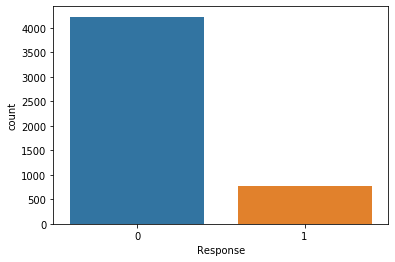

In [5]:
#Gebalanceerdheid
sns.countplot(x='Response',data=dataset)

In [6]:
#Verwijderen van id
dataset=dataset.drop(['id'], axis=1)

In [7]:
#Verwijderen driving license?
dataset['Driving_License'].unique()
#Er is duidelijk meer sprake van mensen met een rijbewijs maar er zijn er wel zonder dus laat ik het staan

array([1, 0])

In [8]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [9]:
#Binary waarden
dataset=dataset.replace(to_replace=['No', 'Yes'], value=[0, 1])
dataset=dataset.replace(to_replace=['Female', 'Male'], value=[0, 1])

In [10]:
#One hot encoding
one_hots=['Region_Code','Vehicle_Age','Policy_Sales_Channel']
for one_hot in one_hots:
    dataset = pd.concat([dataset,pd.get_dummies(dataset[one_hot], prefix=one_hot)],axis=1)
    dataset.drop([one_hot],axis=1, inplace=True)

In [11]:
# Opsplitsen in features en targets
X = dataset.drop(['Response'], axis=1)
y= dataset['Response'].values

print(X)

      Gender  Age  Driving_License  Previously_Insured  Vehicle_Damage  \
0          1   22                1                   1               0   
1          1   42                1                   0               1   
2          0   66                1                   0               1   
3          0   22                1                   0               0   
4          1   28                1                   1               0   
...      ...  ...              ...                 ...             ...   
4995       1   29                1                   1               0   
4996       0   70                1                   1               0   
4997       1   26                1                   1               0   
4998       0   32                1                   0               1   
4999       1   47                1                   0               1   

      Annual_Premium  Vintage  Region_Code_0.0  Region_Code_1.0  \
0             2630.0       16               

In [12]:
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

In [13]:
# training set en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [14]:
# Scaling
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = LogisticRegression(class_weight='balanced')
parameters = {'solver': ['liblinear','newton-cg','lbfgs'],
              'C': uniform(0.001, 1000)} # haal C uit een random uniform distribution


n_iter_search = 10


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=10)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

#Model heeft last van de unbalancedheid, we hebben de class_weight op balanced gezet maar daardoor
#heeft het model nu een duidelijke voorkeur gekregen voor de minderheids klasse
#dit is te zien aan de hoge recall maar de lage precision

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best accuracy :  0.7908571428571428
Best parameters : {'C': 39.27140559478567, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1273
           1       0.39      0.89      0.55       227

    accuracy                           0.78      1500
   macro avg       0.69      0.82      0.70      1500
weighted avg       0.89      0.78      0.81      1500

[[203  24]
 [311 962]]
77.66666666666666


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


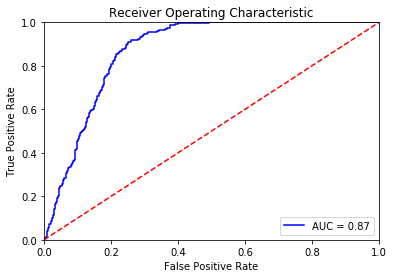

In [49]:
#ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = random_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Imbalanced is moeilijk te zien op de roc curve omdat er veel True negatives zijn
#dus gaat onze false positive rate niet hard zakken

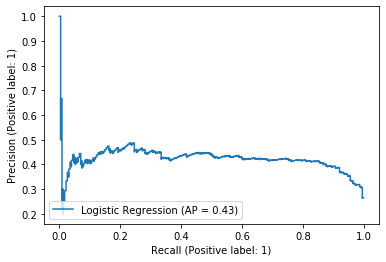

In [50]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(random_search, X_test, y_test, name = 'Logistic Regression')
#AP = Weighted Average Precision over alle thresholds
#Veel gevoeliger aan false positives
#Onze precision zakt naar mate onze recall stijgt. Zoals we ook in ons report zien, Hoge recall
#met lage precision, Je wilt eigen in de rechterboven hoek zitten

In [51]:
model = SVC(probability=True,class_weight="balanced")
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 50), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 0.1)}


n_iter_search = 10


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best accuracy :  0.8014285714285714
Best parameters : {'C': 25.614686471046756, 'gamma': 0.08208923151365893, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1273
           1       0.42      0.85      0.56       227

    accuracy                           0.80      1500
   macro avg       0.69      0.82      0.72      1500
weighted avg       0.88      0.80      0.82      1500

[[ 193   34]
 [ 266 1007]]
80.0


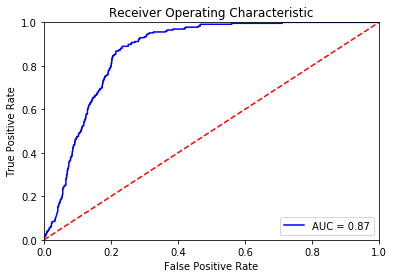

In [52]:
#ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = random_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

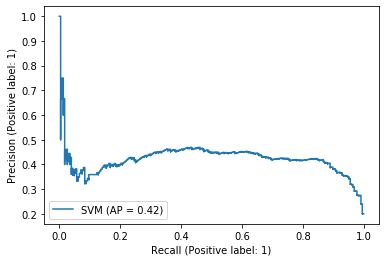

In [53]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(random_search, X_test, y_test, name = 'SVM')

In [16]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( random_state=42, sampling_strategy='minority').fit_resample(X_train, y_train)

print(y_resampled.shape)

(5902,)


In [ ]:
model = SVC(probability=True,class_weight="balanced")
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 1000), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 1)}


n_iter_search = 5


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=1,scoring='f1_macro')

random_search = random_search.fit(X_resampled, y_resampled)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred,labels=[1,0])
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 10 folds for each of 5 candidates, totalling 50 fits


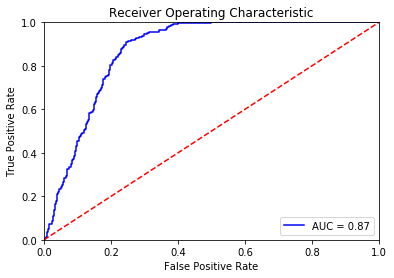

In [55]:
#ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = random_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

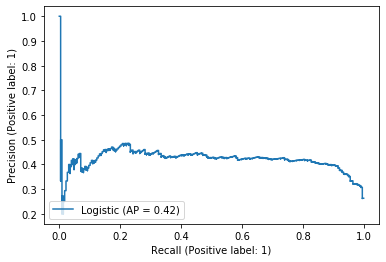

In [56]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(random_search, X_test, y_test, name = 'Logistic')

In [ ]:
#Conclusie. verhoging van f1 score tegenover origineel model is moeilijk te halen, 
#Ook met l1 penalty lukt het niet. 
#Manuele weight balance krijgt onze score ook niet beter
#Scoring parameter aanpassen ook niet